In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
datatypes = dataset.dtypes
datatypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
cat_cols = []
num_cols = []
id1 = "id"
target_column = 'stroke'
for i in range(len(datatypes)):
    if datatypes.index[i] != target_column:
        if datatypes[i]=='object':
            unqval = dataset[datatypes.index[i]].nunique()
            if (unqval < 30):
                cat_cols.append(datatypes.index[i])
            else:
                del dataset[datatypes.index[i]]
                print('Deleted: ',datatypes.index[i])
        else:
            num_cols.append(datatypes.index[i])
num_cols

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [8]:
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
cat_data = []
num_data = []
if(len(cat_cols)>0):
    cat_data = dataset[cat_cols]
if(len(num_cols)>0):
    num_data = dataset[num_cols]
y_data = dataset[target_column]

In [10]:
num_data,cat_data

(         id   age  hypertension  heart_disease  avg_glucose_level   bmi
 0      9046  67.0             0              1             228.69  36.6
 1     51676  61.0             0              0             202.21   NaN
 2     31112  80.0             0              1             105.92  32.5
 3     60182  49.0             0              0             171.23  34.4
 4      1665  79.0             1              0             174.12  24.0
 ...     ...   ...           ...            ...                ...   ...
 5105  18234  80.0             1              0              83.75   NaN
 5106  44873  81.0             0              0             125.20  40.0
 5107  19723  35.0             0              0              82.99  30.6
 5108  37544  51.0             0              0             166.29  25.6
 5109  44679  44.0             0              0              85.28  26.2
 
 [5110 rows x 6 columns],
       gender ever_married      work_type Residence_type   smoking_status
 0       Male         

In [11]:
if len(num_data):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
    imputer.fit(num_data.iloc[:,:].values)
    num_data = pd.DataFrame(imputer.transform(num_data.iloc[:,:].values))
    num_data.columns = num_cols
num_data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046.0,67.0,0.0,1.0,228.69,36.600000
1,51676.0,61.0,0.0,0.0,202.21,28.893237
2,31112.0,80.0,0.0,1.0,105.92,32.500000
3,60182.0,49.0,0.0,0.0,171.23,34.400000
4,1665.0,79.0,1.0,0.0,174.12,24.000000
...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,28.893237
5106,44873.0,81.0,0.0,0.0,125.20,40.000000
5107,19723.0,35.0,0.0,0.0,82.99,30.600000
5108,37544.0,51.0,0.0,0.0,166.29,25.600000


In [12]:
if(len(cat_data)>0 and len(num_data)>0):
    print("1")
    df = pd.concat([num_data,cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
    df.isnull().sum()
elif(len(num_data) > 0):
    print("2")
    df = pd.concat([num_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
else:
    print("3")
    df = pd.concat([cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
(df)

1


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.600000,Male,Yes,Private,Urban,formerly smoked,1
1,51676.0,61.0,0.0,0.0,202.21,28.893237,Female,Yes,Self-employed,Rural,never smoked,1
2,31112.0,80.0,0.0,1.0,105.92,32.500000,Male,Yes,Private,Rural,never smoked,1
3,60182.0,49.0,0.0,0.0,171.23,34.400000,Female,Yes,Private,Urban,smokes,1
4,1665.0,79.0,1.0,0.0,174.12,24.000000,Female,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,28.893237,Female,Yes,Private,Urban,never smoked,0
5106,44873.0,81.0,0.0,0.0,125.20,40.000000,Female,Yes,Self-employed,Urban,never smoked,0
5107,19723.0,35.0,0.0,0.0,82.99,30.600000,Female,Yes,Self-employed,Rural,never smoked,0
5108,37544.0,51.0,0.0,0.0,166.29,25.600000,Male,Yes,Private,Rural,formerly smoked,0


In [13]:
cat_data = df[cat_cols]
num_data = df[num_cols]
y_data = df[target_column]
df.drop(target_column,inplace=True,axis=1)
len(y_data)

5110

In [14]:
#if len(cat_cols):
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(OH_encoder.fit_transform(df[cat_cols]))

# One-hot encoding removed index; put it back
X_encoded.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, X_encoded], axis=1)

In [15]:
OH_X

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,0,1,2,3,...,6,7,8,9,10,11,12,13,14,15
0,9046.0,67.0,0.0,1.0,228.69,36.600000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676.0,61.0,0.0,0.0,202.21,28.893237,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,80.0,0.0,1.0,105.92,32.500000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182.0,49.0,0.0,0.0,171.23,34.400000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,28.893237,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,44873.0,81.0,0.0,0.0,125.20,40.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,19723.0,35.0,0.0,0.0,82.99,30.600000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544.0,51.0,0.0,0.0,166.29,25.600000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [16]:
count = y_data.value_counts()
count
len(y_data)

5110

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
OH_X = sc_x.fit_transform(OH_X)

In [18]:
OH_X

array([[-1.29831203,  1.05143428, -0.32860186, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.71637149,  0.78607007, -0.32860186, ..., -0.45767615,
         1.30416474, -0.42731326],
       [-0.25547819,  1.62639008, -0.32860186, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.79371959, -0.36384151, -0.32860186, ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.04849658,  0.34379639, -0.32860186, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.38569496,  0.03420481, -0.32860186, ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(OH_X,y_data,test_size=0.2,random_state=0)

<AxesSubplot:>

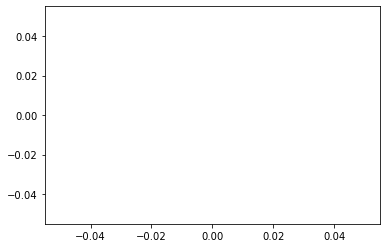

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
nodes = [10,15,20,25,50,100,200]
accuracy =[]
for node in nodes:    
    model = RandomForestRegressor(criterion = 'mse', random_state=0, n_estimators=node)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
#     accs = accuracy_score(y_test,preds)
#     accuracy.append(accs)
#     print(confusion_matrix(y_test,preds),'No of Estimators: ', node,accs)



In [28]:
y_test,preds

(42      1
 380     0
 3524    0
 352     0
 4927    0
        ..
 472     0
 4446    0
 660     0
 57      1
 2367    0
 Name: stroke, Length: 1022, dtype: int64,
 array([0.22 , 0.   , 0.04 , ..., 0.04 , 0.23 , 0.035]))

In [ ]:
from xgboost import XGBRegressor   #XGBoostClassifier
classifier = XGBRegressor(max_depth=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)